In [1]:
#535230080_Georgia Sugisandhea
#Mengimport semua library yang akan digunakan
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
#Membaca file yorkshire.csv menggunakan pandas dan memasukkannya ke variable dfY
dfY = pd.read_csv("yorkshire.csv")
#Menampilkan 5 baris pertama dari dfY
dfY.head()

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO


Text(0, 0.5, 'Income (£)')

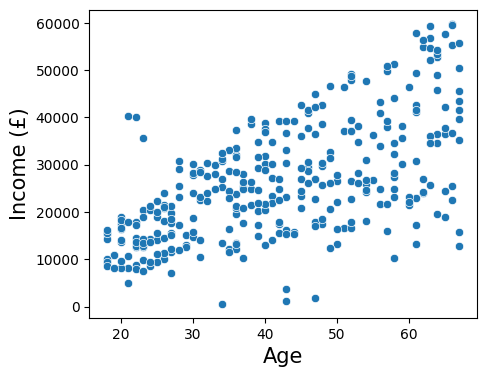

In [3]:
#Membuat plot menggunakan matplotlib dengan size 5 x 4 dan resolusi 100 dots per inch
plt.subplots(figsize=(5,4), dpi=100)
#Menmbuat scatter plot menggunakan seaborn dengan data x dari kolom age dan data y dari kolom income, dimana data data tersebut didapat dari dfY dan menggunakan marker bulat
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
#Membuat label dari sumbu x sebagai Age dengan size penulisan 15
ax.set_xlabel('Age', fontsize=15)
#Membuat label dari sumbu y sebagai Income dalam pound dengan size penulisan 15 dan dirotasi sebesar 90 derajat, sehingga menjadi sejajar dengan sumbu y
ax.set_ylabel('Income (£)', fontsize=15, rotation=90)

In [4]:
#Memulai pembuatan model untuk linear regression dan memasukkannya ke variable regY
regY = linear_model.LinearRegression()
#Memasukkan data kolom age dari dfY dan diconvert terlebih dahulu dari pd ke numpy
#reshape(-1,1) mengganti bentuk array dari 1D menjad 2D
#Membuat model regression linear dari kolom age dan income dari dfY dan memasukkannya ke model yang kita buat sebelumnya dengan regY.fit()
regY.fit(dfY["age"].to_numpy().reshape(-1,1), dfY["income"])

LinearRegression()

dengan α = intercept coefficient dan β = regression coefficient, terdapat rumus dari kedua variable diatas adalah:
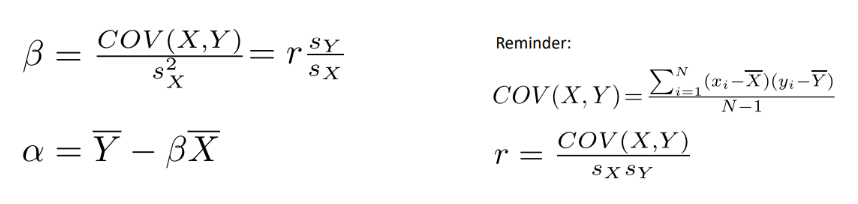


In [5]:
#Mengambil dan menampilkan data koefisien regresi beta dari regY yang telah kita buat sebelumnya dengan akurasi 3 angka dibelakang koma
print("Regression coefficient beta = %.3f" % (regY.coef_))
#Mengambil dan menampilkan daya koefisien intercept alpha dari regY yang telah kita buat sebelumnya dengan akurasi 3 angka belakang koma
print("Intercept coefficient alpha = %.3f" % (regY.intercept_))

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\2859484606.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regY.coef_))


In [6]:
#menghitung koefisien regresi beta dari age dan income tabel dfY yang dikalikan dengan standar deviasi dari kolom income dan dibagi dengan standar deviasi dari kolom age dan memasukkannya ke variable beta
#ddof=1 untuk memastikan bahwa kalkulasi yang dilaksanakan menggunakan formula sample standar deviasi
beta = stats.pearsonr(dfY["age"], dfY["income"])[0] * np.std(dfY["income"], ddof=1)/np.std(dfY["age"], ddof=1)
#Menampilkan hasil perhitungan beta yang telah dilaksanakan
print("Regression coefficient beta = %.3f" % (beta))

#menghitung koefisien intercept alpha dari rata rata dari kolom income tabel dfY kemudian dikurangkan dengan variable beta yang sudah dihitung sebelumnya yang dikalikan dengan rata rata kolom age tabel dfY dan dimasukkan ke variable alpha
alpha = np.mean(dfY["income"]) - beta * np.mean(dfY["age"])
#Menampilkan hasil perhitungan alpha yang telah dilakukan
print("Intercept coefficient alpha = %.3f" %(alpha))

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


In [7]:
#Memasukkan 34 ke dalam variable age
age = 34
#Memprediksi hasil data yang didapatkan jika kolom age diisi dengan 34 dengan data regY yang sudah dibuat
income = regY.predict([[age]])
#Menampilkan hasil perhitungan
print("Income when you necome %d would be £%.2f" %(age, income))

#Menghitung hasil data yang seharusnya didapatkan secara manual dengan mengalikan variable age dengan beta lalu menambahkannya dengan alpha
y = alpha+ beta * age
#Menampilkan hasil perhitungan
print("Income when you become %d would be £%.2f (analytically)" %(age, y))

#Menampilkan rumus manual yang digunakan
print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


Income when you necome 34 would be £21961.40
Income when you become 34 would be £21961.40 (analytically)
Income = 3631.490 + 539.115 x Age


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\726630803.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income when you necome %d would be £%.2f" %(age, income))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\726630803.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


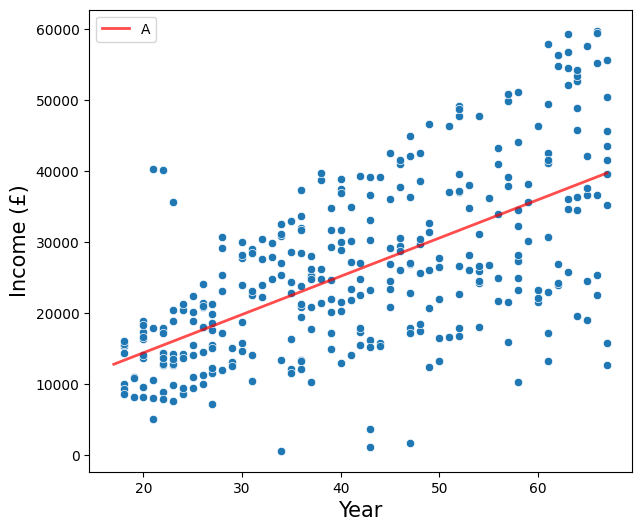

In [8]:
#Menginisialisasi plot menggunakan pyplot dengan ukuran 7 x 6 dan resolusi 100 dots per inch
plt.subplots(figsize=(7,6), dpi=100)
#Membuat grafik scatter plot menggunakan seaborn dengan data sumbu x adalah kolom age dan sumbu y adalah income dari data dfY dan dengan titik bulat
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
#Membuat label sumbu x sebagai year dengan ukuran tulisan 15
ax.set_xlabel('Year', fontsize=15)
#Membuat label dari sumbu y sebagai Income dalam pound dengan size penulisan 15 dan dirotasi sebesar 90 derajat, sehingga menjadi sejajar dengan sumbu y
ax.set_ylabel('Income (£)', fontsize=15, rotation=90)

#Menginisialilsasi variable min sebagai minimum dari kolom age dikurang 1
min = dfY['age'].min()-1
#dan max sebagai maximum dari kolom age ditambah 1
max = dfY['age'].max()+1
#Membuat prediksi hasil data dengan range input age dari min sampai max untuk keperluan garis
model = regY.predict(np.arange(min,max).reshape(-1,1))
#Membuat lineplot berdasarkan hasil perhitungan model sebagai sumbu y dan range angka min sampai max pada sumbu x
#dengan linestyle garis biasa dan warna merah dan label A, transparansi sebesar 0.7 dimana 1 adalah solid dan 0 adalah transparan dan ketebalan garis 2
ax = sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)


In [9]:
#Membaca file nutrition.csv dengan pandas dan memasukkannya ke variable dfNut
dfNut = pd.read_csv("nutrition.csv")
#Menampilkan 5 baris pertama dari dfNut
dfNut.head()

,KnowledgeScore,CalciumIntake
0,10,450
1,42,1050
2,38,900
3,15,525
4,22,710


Rumus lain yang dapat kita perhatikan
yang nantinya akan digunakan adalah:

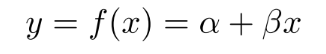

Text(0, 0.5, 'Calcium Intake')

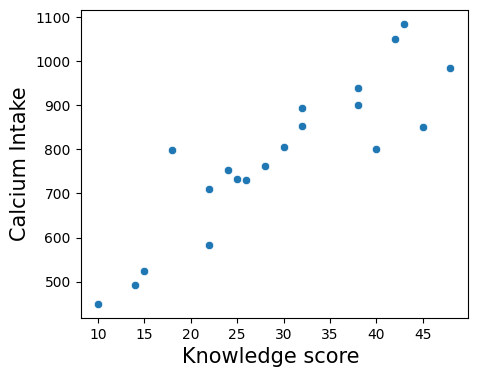

In [10]:
#Menginisialisasi plot menggunakan pyplot dengan ukuran 7 x 6 dan resolusi 100 dots per inch
plt.subplots(figsize=(5,4), dpi=100)
#Membuat scatterplot dari kolom knowledgescore dan calciumintake dari data dfNut dengan titik bulat
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
#Membuat label dari sumbu x menjadi Knowledge score dengan ukuran tulisan 90
ax.set_xlabel('Knowledge score ', fontsize=15)
#Membuat label dari sumbu y sebagai Calcium intake dalam pound dengan size penulisan 15 dan dirotasi sebesar 90 derajat, sehingga menjadi sejajar dengan sumbu y
ax.set_ylabel('Calcium Intake', fontsize=15, rotation=90)

Reminder rumus rumus =
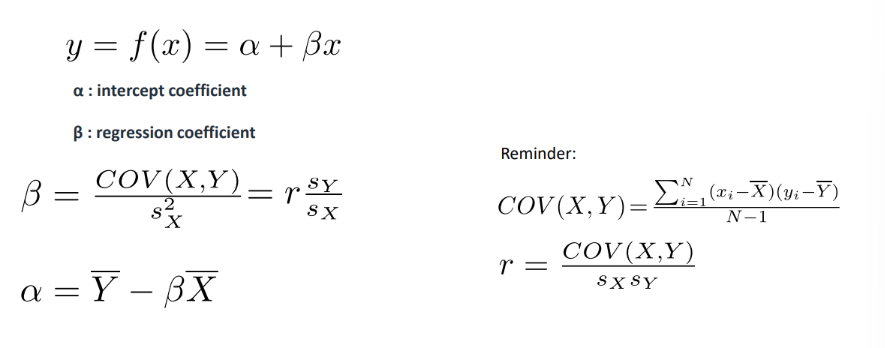

In [11]:
#Mencari nilai yang dipusatkan dari knowledge score dan calcium intake dfNut dan dimasukkan ke varoable x dan y
x = (dfNut["KnowledgeScore"]-np.mean(dfNut["KnowledgeScore"]))
y = (dfNut["CalciumIntake"]-np.mean(dfNut["CalciumIntake"]))
#r1 sebagai proses perhitungan manual koefisien korelasi Pearson
r1 = np.sum(x*y)/(dfNut.shape[0]-1)/np.std(dfNut["KnowledgeScore"], ddof=1)/np.std(dfNut["CalciumIntake"], ddof=1)
#r2 sebagai penggunaan library scipy.stats dalam pencarian koefisien korelasi Pearson
# _ digunakan untuk mengabaikan output p-value
r2,_ = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])
#r3 sebagai penggunaan library numpy dalam mencari koefisien korelasi Pearson
r3 = np.corrcoef(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])

#Menampilkan hasil perhitungan
print("R1: %.3f" % (r1))
print("R2: %.3f" % (r2))
print("R3: %.3f" % (r3[0][1]))

R1: 0.882
R2: 0.882
R3: 0.882


In [12]:
#Membuat dataframe baru bernama dfNutX yang isinya kolom dfNut KnowledgeScore saja
dfNutX = pd.DataFrame(dfNut['KnowledgeScore'])
#Menghapus kolom KnowledgeScore pada dfNut dan memasukkannya kepada variable dfNutY
dfNutY = dfNut.drop('KnowledgeScore', axis='columns')
#Memulai pembuatan model untuk linear regression dan memasukkannya ke variable regY
regNut = linear_model.LinearRegression()
#Membuat model regression linear dari dfNutX dan dfNutY dan memasukkannya ke model yang kita buat sebelumnya dengan regNut.fit()
regNut.fit(dfNutX, dfNutY)

LinearRegression()

In [13]:
#Mengambil dan menampilkan data koefisien regresi beta dari regNut yang telah kita buat sebelumnya dengan akurasi 3 angka dibelakang koma
print("Regression coefficient beta = %.3f" % (regNut.coef_))
#Mengambil dan menampilkan data koefisien intercept alpha dari regY yang telah kita buat sebelumnya dengan akurasi 3 angka dibelakang koma
print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))

Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743
CI = 373.743 + 13.897 x KS


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\2727023481.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regNut.coef_))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\2727023481.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\2727023481.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  

In [14]:
#menghitung coefisien regresi beta dari KnowledgeScore tabel dfY dan CalciumIntake tabel dfY yang dikalikan dengan standar deviasi dari kolom CalciumIntake dan dibagi dengan standar deviasi dari kolom KnowledgeScore dan memasukkannya ke variable beta
#ddof=1 untuk memastikan bahwa kalkulasi yang dilaksanakan menggunakan formula sample standar deviasi
beta = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])[0]*np.std(dfNut["CalciumIntake"],ddof=1)/np.std(dfNut["KnowledgeScore"],ddof=1)

#Menampilkan hasil perhitungan yang telah dilaksankan
print("Regression coefficient beta = %.3f" % (beta))

#<enghitung koefisien intercept alpha dari rata rata dari kolom CalciumIntake tabel dfY kemudian dikurangkan dengan variable beta yang sudah dihitung sebelumnya yang dikalikan dengan rata rata kolom KnowledgeScore tabel dfY dan dimasukkan ke variable alpha
alpha = np.mean(dfNut["CalciumIntake"]) - beta * np.mean(dfNut["KnowledgeScore"])

#Menampilkan hasil perhitungan yang telah dilaksanakan
print("Intercept coefficient alpha %.3f" % (alpha))

Regression coefficient beta = 13.897
Intercept coefficient alpha 373.743


Rumus untuk menghitung R2 =
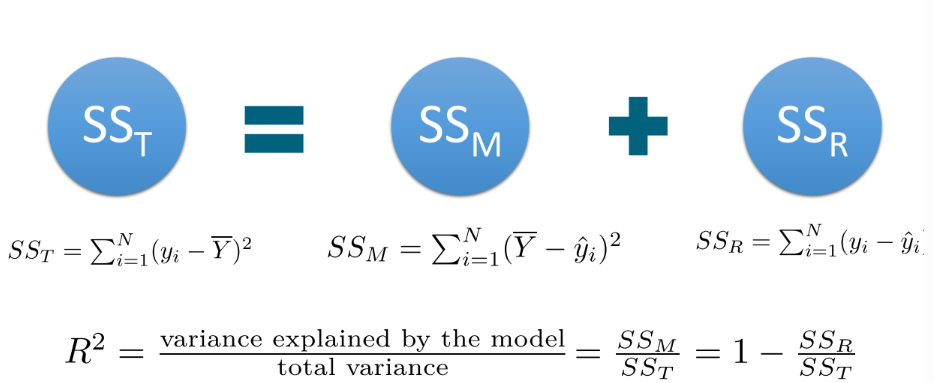

In [15]:
#Menghitung prediksi hasil data yang didapatkan dengan data dfNutX dengan regNut
predictNut = regNut.predict(dfNutX)
#Perhitungan R2 dengan library sklearn dan menampilkan hasilnya
print('R2 (sklearn ): ',r2_score(dfNut["CalciumIntake"], predictNut))

#Perhitungan R2 secara manual
ssT = [((dfNut["CalciumIntake"][i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0,len(dfNut["CalciumIntake"]))]
ssR = [((dfNut["CalciumIntake"][i]-predictNut[i])**2) for i in range(0,len(dfNut["CalciumIntake"]))]
ssM = [((predictNut[i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0,len(dfNut["CalciumIntake"]))]

#Menampilkan hasil perhitungan yang telah dilaksanakan
print("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print("R2 (method B):", 1-np.sum(ssR)/np.sum(ssT))

R2 (sklearn ):  0.7783741285106188
R2 (method A): 0.778374128510618
R2 (method B): 0.7783741285106188


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


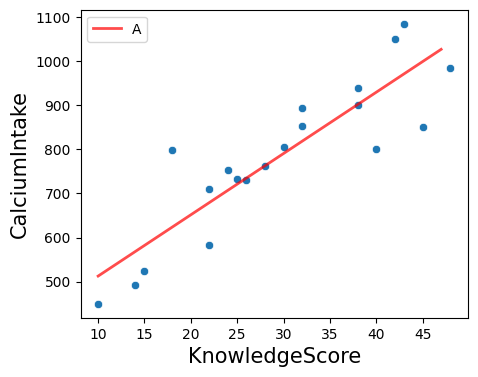

In [16]:
#Menginisialisasi plot menggunakan pyplot dengan ukuran 5 x 4 dan resolusi 100 dots per inch
plt.subplots(figsize=(5,4), dpi=100)
#Membuat scatter plot menggunakan seaborn dimana sumbu x untuk kolom KnowledgeScore dan y untuk kolom CalciumIntake dari data dfNut dan titik bulat
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
#Membuat label dari sumbu x sebagai KnowledgeScore dan besar tulisannya 15
ax.set_xlabel('KnowledgeScore', fontsize=15)
#Membuat label dari sumbu y sebagai Calcium intake dalam pound dengan size penulisan 15 dan dirotasi sebesar 90 derajat, sehingga menjadi sejajar dengan sumbu y
ax.set_ylabel('CalciumIntake', fontsize=15, rotation=90)

#Memasukkan nilai minimum dan maksimum dari kolom KnowledgeScore kepada variable min dan max
min = np.min(dfNut["KnowledgeScore"])
max = np.max(dfNut["KnowledgeScore"])

#Menghitung prediksi hasil data yang akan keluar dari masing masing input angka dalam range min sampai max yang telah dihitung sebelumnya dan dimasukkan ke variable predictNut
#reshape(-1,1) mengganti bentuk array dari 1D menjad 2D
predictNut = regNut.predict(np.arange(min,max).reshape(-1,1))
#Membuat garis lineplot berdasarkan hasil prediksi yang telah dihitung sebelumnya sebagai sumbu y dan range min sampai max sebagai sumbu x nya
#predictNut.flatten() = untuk menjadikan array 2 dimensi menjadi array 1 dimensi
#Dengan linestyle solid, warna merah, label sebagai A, transparansi sebesar 0.7 (dimana 1 adalah solid dan 0 adalah transparan) dan ketebalan garis 2
ax = sns.lineplot(y=predictNut.flatten(), x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)


In [17]:
#Memasukkan 30 dalam knowledgeScore
knowledgeScore = 30
#Memprediksi hasil data calcium yang akan didapatkan ketika data kolom KnowledgeScore diisi dengan 30 (knowledgeScore)
calcium = regNut.predict([[knowledgeScore]])
#Menampilkan hasil perhitungan
print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))

#Menghitung prediksi yang sama dengan diatas, namun dengan cara manual yaitu dengan menambahkan koefisien intercept dari regNut dengan koefisien regresi yang dikalikan knowledgeScore
CI = regNut.intercept_ + regNut.coef_ * knowledgeScore
#Menampilkan hasil perhitungan
print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))

Approximate calcium intake when knowledge score is 30 would be 790.66
Approximate calcium intake when knowledge score is 30 would be 790.66


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\3272927374.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\3272927374.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))